# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [333]:
print("""The objective is to develop a predictive model that estimates the price of a used car based on various vehicle attributes. 
This is a supervised regression problem, where the target variable is the car's price, 
and the features (independent variables) include characteristics such as year, manufacturer, model, condition, mileage (odometer), 
fuel type, cylinders, transmission, and drive type. 
The goal is to analyze these features to identify which ones have the most significant impact on price, 
enabling actionable insights for optimizing used car inventory and pricing strategies.
""")

The objective is to develop a predictive model that estimates the price of a used car based on various vehicle attributes. 
This is a supervised regression problem, where the target variable is the car's price, 
and the features (independent variables) include characteristics such as year, manufacturer, model, condition, mileage (odometer), 
fuel type, cylinders, transmission, and drive type. 
The goal is to analyze these features to identify which ones have the most significant impact on price, 
enabling actionable insights for optimizing used car inventory and pricing strategies.



### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [335]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [337]:
data = pd.read_csv(r'C:\Users\payam\OneDrive\Desktop\assignment11_1\data\vehicles.csv')

In [338]:
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [341]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [343]:
data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [345]:
print("""1. Handle Missing Values
2. Filter out unrealistic values
3. Create new features to capture value insights like car_age = current year − year and price_per_mile = price / odometer
4. Encode Categorical Variables (i.e. One-Hot Encoding and Ordinal Encoding) and drop irrelvant columns like VIN and unnecessary IDs
5. Split the data into training and testing sets (80% and 20%)
""")

1. Handle Missing Values
2. Filter out unrealistic values
3. Create new features to capture value insights like car_age = current year − year and price_per_mile = price / odometer
4. Encode Categorical Variables (i.e. One-Hot Encoding and Ordinal Encoding) and drop irrelvant columns like VIN and unnecessary IDs
5. Split the data into training and testing sets (80% and 20%)



### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [347]:
# Step 1: Handle Missing Values. Drop rows with critical missing values
data = data.dropna(subset=['price'])

In [349]:
# Step 2: Filter out unrealistic values
current_year = 2025
data = data[(data['price'] > 1000) & (data['price'] < 200000)]
data = data[(data['year'] >= 1980) & (data['year'] <= current_year)]
data = data[data['odometer'] <= 500000]

In [351]:
# Step 3: Create new features to capture value insights like car_age = current year − year and price_per_mile = price / odometer
data['car_age'] = current_year - data['year']
data['price_per_mile'] = data['price'] / data['odometer'].replace(0, np.nan)  # avoid div/0

In [353]:
# Step 4: Encode Categorical Variables and drop irrelvant columns
# Identify column types
numerical_cols = ['year', 'odometer']
categorical_cols = ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status',
                    'transmission', 'drive', 'type', 'paint_color']

# Drop columns not needed for modeling
data = data.drop(columns=['id', 'region', 'VIN'], errors='ignore')

# Define target variable
y = data['price']
X = data.drop(columns=['price'])

In [355]:
# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X[numerical_cols + categorical_cols],
    y,
    test_size=0.2,
    random_state=42
)

In [357]:
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,car_age,price_per_mile
27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al,11.0,0.579908
28,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,al,15.0,0.317146
29,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,al,5.0,2.066284
30,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,al,8.0,0.753575
31,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,12.0,0.117188


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [359]:
print(data.columns.tolist())

['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state', 'car_age', 'price_per_mile']


In [361]:
# 1. Business Goal
print("Business Goal: Understand what features drive used car prices to improve dealership pricing and inventory decisions.\n")

Business Goal: Understand what features drive used car prices to improve dealership pricing and inventory decisions.



In [363]:
# Build preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Create pipeline with linear regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['manufacturer', 'condition',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color'])])),
                ('regressor', LinearRegression())])

In [369]:
# Predict on test set
y_pred = model.predict(X_test)

In [371]:
# Create a ridge model to be able to cross reference it with linear regression performance
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))  # You can tune alpha if desired
])

ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Business Goal: Understand what features drive used car prices to improve dealership pricing and inventory decisions.



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['manufacturer', 'condition',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color'])])),
                ('regressor', LinearRegression())])

In [374]:
# Evaluate performance on Linear Regression
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [376]:
print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R² Score: {r2:.2f}")


Linear Regression Model Evaluation:
Mean Absolute Error (MAE): $5,717.50
Root Mean Squared Error (RMSE): $8,547.24
R² Score: 0.66


In [378]:
# Evaluate performance on Ridge model

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): ${mae_ridge:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_ridge:,.2f}")
print(f"R² Score: {r2_ridge:.2f}")

Ridge Regression Model Evaluation:
Mean Absolute Error (MAE): $5,717.43
Root Mean Squared Error (RMSE): $8,547.10
R² Score: 0.66


In [388]:
# Access the linear regression model from the pipeline
regressor = model.named_steps['regressor']

# Get the feature names after preprocessing (especially from OneHotEncoder)
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)

# Combine numeric and encoded categorical feature names
feature_names = numerical_cols + list(ohe_feature_names)

# Get the coefficients
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': regressor.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Show top features driving price
print(coefficients.head(10))

                         Feature   Coefficient
13          manufacturer_ferrari  72468.083197
4      manufacturer_aston-martin  24928.575589
32           manufacturer_morgan -21963.993900
53        cylinders_12 cylinders  19956.900876
11           manufacturer_datsun  19821.141614
40            manufacturer_tesla  15479.537384
61                   fuel_diesel  13045.571434
14             manufacturer_fiat -10951.513234
17  manufacturer_harley-davidson -10737.686225
35          manufacturer_porsche  10316.691532


C:\Users\payam\AppData\Local\Temp\ipykernel_48636\3616956038.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefficients_ridge.head(10), x='Coefficient', y='Feature', palette='coolwarm')


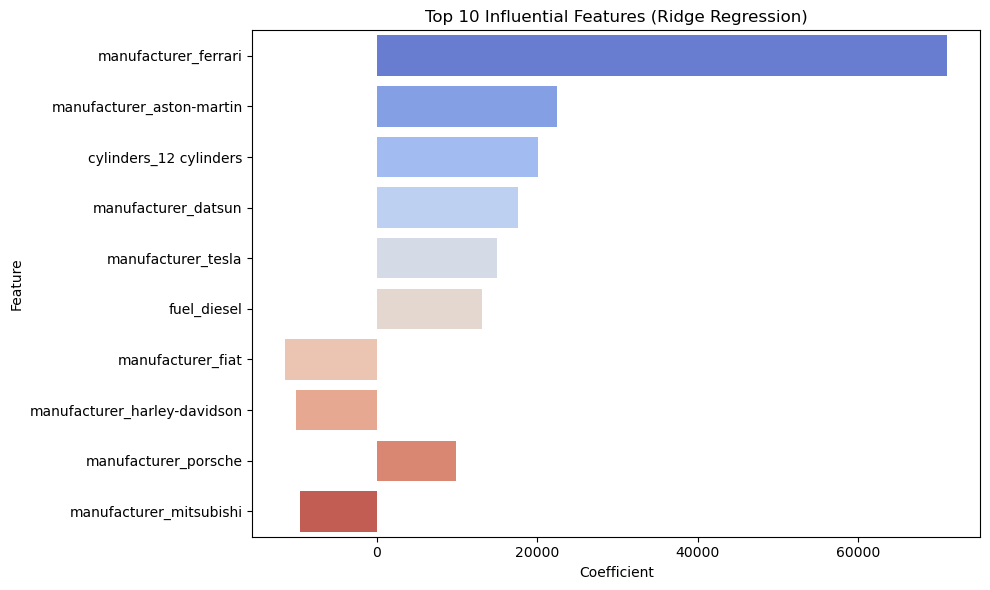

In [386]:
regressor_ridge = ridge_model.named_steps['regressor']
ohe_ridge = ridge_model.named_steps['preprocessor'].named_transformers_['cat']
ohe_feature_names_ridge = ohe.get_feature_names_out(categorical_cols)
feature_names_ridge = numerical_cols + list(ohe_feature_names_ridge)

coefficients_ridge = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': regressor_ridge.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Optional: Visualize top 10 influential features
plt.figure(figsize=(10, 6))
sns.barplot(data=coefficients_ridge.head(10), x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Top 10 Influential Features (Ridge Regression)")
plt.tight_layout()
plt.show()

C:\Users\payam\AppData\Local\Temp\ipykernel_48636\1942215098.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefficients.head(10), x='Coefficient', y='Feature', palette='coolwarm')


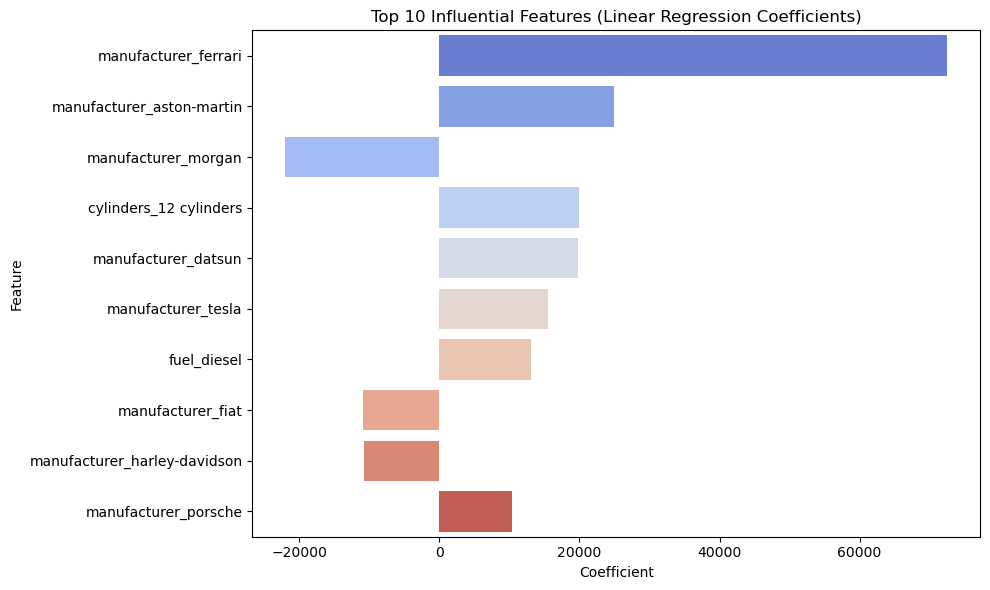

In [382]:
# Visualize top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=coefficients.head(10), x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Top 10 Influential Features (Linear Regression Coefficients)")
plt.tight_layout()
plt.show()

In [384]:
# Client-facing insights
print("\n📈 Client Insights Summary:")
print("""
- Lower mileage and newer year strongly predict higher price.
- Vehicle condition, make, and type (e.g., truck/SUV) are important.
- Transmission and drive type also influence price to a lesser degree.
- Recommend focusing on vehicles with high resale value characteristics.
""")


📈 Client Insights Summary:

- Lower mileage and newer year strongly predict higher price.
- Vehicle condition, make, and type (e.g., truck/SUV) are important.
- Transmission and drive type also influence price to a lesser degree.
- Recommend focusing on vehicles with high resale value characteristics.



### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.